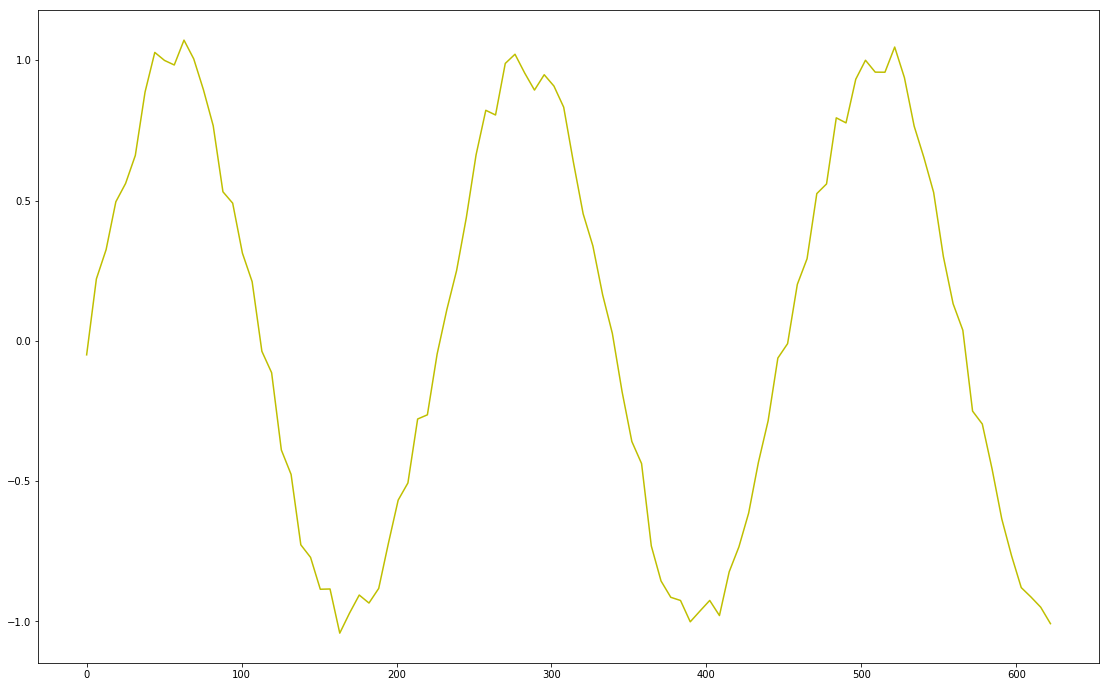

In [89]:
import numpy as np
import math

n = 100
x = [i*2*math.pi for i in range(0,n,1)]
#y = [(i-1)*(i-1) for i in x]
y = [math.sin(i/36) for i in x]
# add noise 
y = [i+np.random.normal(0,0.05) for i in y]
#print(x)
#print(y)

import matplotlib.pyplot as plt

plt.figure(figsize=(19, 12))
plt.plot([i for i in x], [i for i in y], 'y')
plt.show()

In [90]:
import random
order = list(range(0,n,1))
random.shuffle(order)

train_size = int(n*0.6)
test_size = int(n*0.4)

train_x = [[x[i]] for i in order[:train_size]]
train_y = [[y[i]] for i in order[:train_size]]

test_x = [[x[i]] for i in order[-test_size:]]
test_y = [[y[i]] for i in order[-test_size:]]

print(len(train_x)+len(test_x))

100


In [91]:
import tensorflow as tf

In [95]:
size_layer_0 = 7
size_layer_1 = 7

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    inputs = tf.placeholder(tf.float32, shape=[None,1])
    labels = tf.placeholder(tf.float32, shape=[None,1])
    
    w0 = tf.Variable(tf.random_uniform([ 1,size_layer_0],-0.1,0.1, dtype=tf.float32))
    b0 = tf.Variable(tf.zeros([size_layer_0])) 
    
    w1 = tf.Variable(tf.random_uniform([ size_layer_0, size_layer_1],-0.1,0.1, dtype=tf.float32))
    b1 = tf.Variable(tf.zeros([size_layer_1]))
    
    w2 = tf.Variable(tf.random_uniform([ size_layer_1, 1],-0.1,0.1, dtype=tf.float32))
    b2 = tf.Variable(tf.zeros([1]))    
    
    def the_model(x):
        logits = tf.matmul(x,w0)+b0
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w1)+b1
        logits = tf.nn.relu(logits)
        logits = tf.matmul(logits,w2)+b2
        logits = tf.nn.relu(logits)
        return logits
    
    estimated_labels = the_model(inputs)
    loss = tf.reduce_mean(tf.squared_difference(estimated_labels, labels))
    
    optimizer = tf.train.AdagradOptimizer(0.5).minimize(loss)


In [96]:
def plot(x,y,_y):
    plt.figure(figsize=(19, 12))
    plt.plot([i[0] for i in x], [i[0] for i in y], 'ro')
    plt.plot([i[0] for i in x], [i[0] for i in _y], 'bo')
    plt.show()

0.461383
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085
0.420085


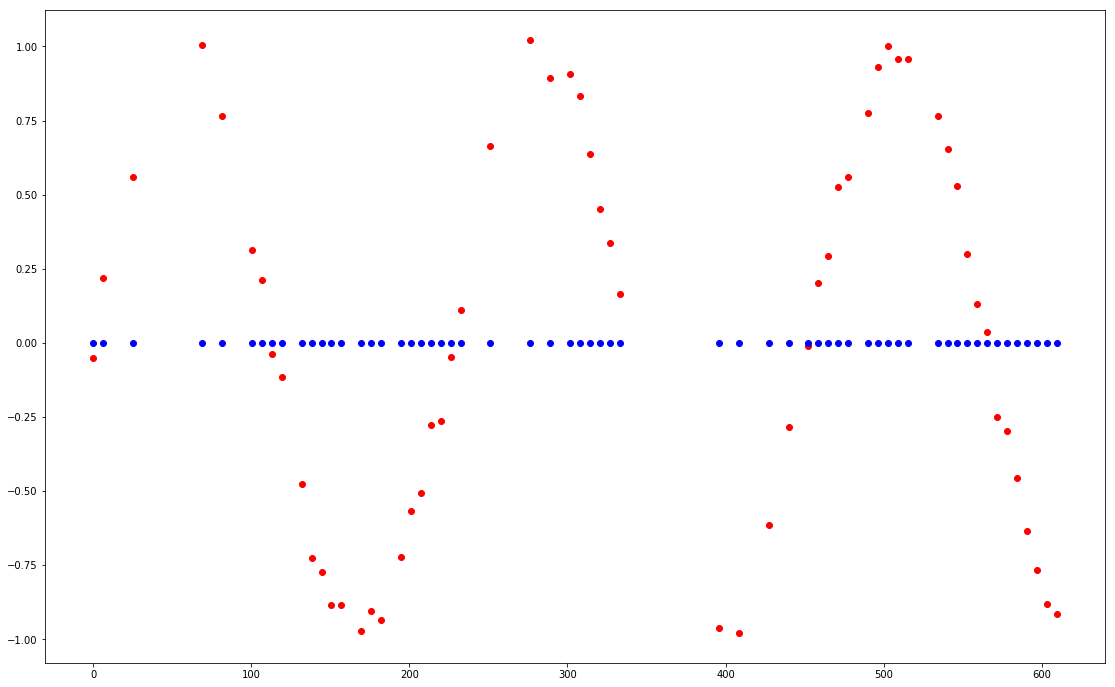

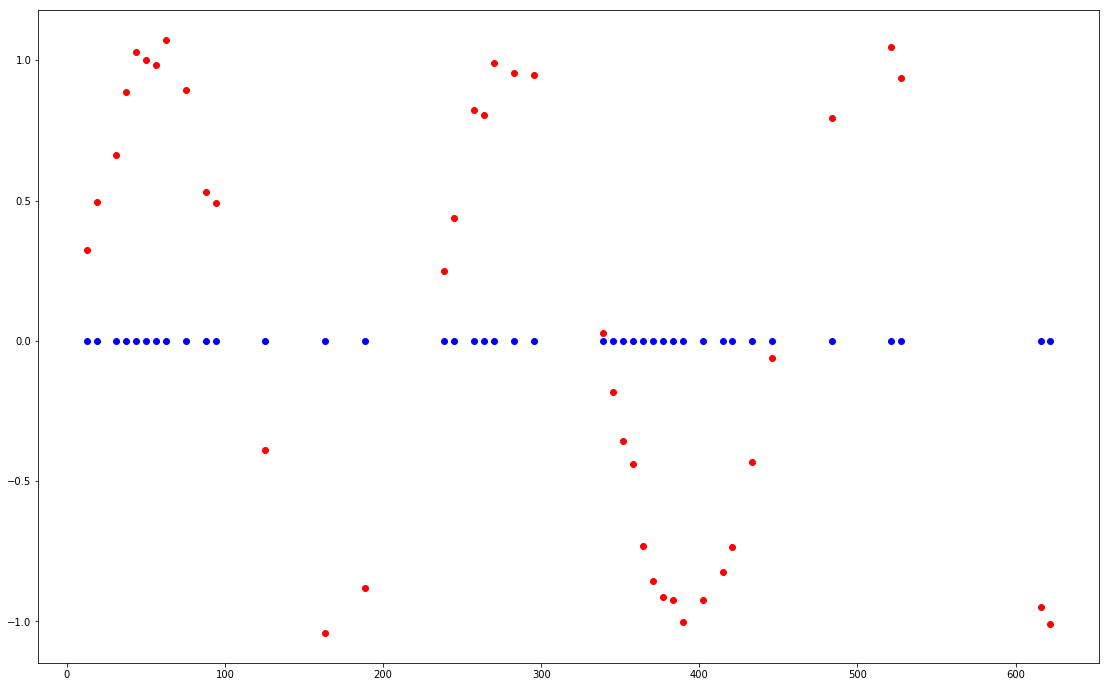

In [97]:
n_step = 20000
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for i in range(n_step):
        feed_dict = {inputs: train_x, labels: train_y}
        _, _loss, _estimated_labels = session.run([optimizer,loss,estimated_labels],feed_dict = feed_dict)
        if i % 1000 == 0:
            print(_loss)
    print(_loss)
    feed_dict = {inputs: test_x, labels: test_y}
    test_labels = estimated_labels.eval(feed_dict = feed_dict)

plot(train_x, train_y, _estimated_labels)
plot(test_x, test_y, test_labels)

In [ ]:
#2.45372e+07